In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Observo el set de datos
train = pd.read_csv('setDeDatos/nlp-getting-started/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Elimino columnas innecesarias
train = train.drop(columns=['id','keyword','text'])
train.head()

,location,target
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1


In [4]:
# Veo si el dataframe tiene valores nulos
train.isnull().any()

location     True
target      False
dtype: bool

In [5]:
# Trabajo sobre los nulos de location
train['location'] = train['location'].fillna('Sin Ubicacion')
train.isnull()

,location,target
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7608,False,False
7609,False,False
7610,False,False
7611,False,False


In [6]:
# Renombro las columnas
train.rename(columns = {'location':'ubicacion'}, inplace = True)
train.rename(columns = {'target':'veracidad'}, inplace = True)
train.head()

,ubicacion,veracidad
0,Sin Ubicacion,1
1,Sin Ubicacion,1
2,Sin Ubicacion,1
3,Sin Ubicacion,1
4,Sin Ubicacion,1


In [7]:
train = train.groupby('ubicacion').agg({'veracidad':['sum', 'count']})
train.columns = ['verdaderos','totales']
train = train.sort_values('totales', ascending=False)
train.head()

,verdaderos,totales
ubicacion,,
Sin Ubicacion,1075,2533
USA,67,104
New York,16,71
United States,27,50
London,16,45


In [8]:
# Ubicaciones con mas de 20 tweets
train = train.loc[train['totales'] > 20,:]
train

,verdaderos,totales
ubicacion,,
Sin Ubicacion,1075,2533
USA,67,104
New York,16,71
United States,27,50
London,16,45
Canada,13,29
Nigeria,22,28
UK,16,27
"Los Angeles, CA",8,26


In [9]:
# Agrupo USA y United States
train = train.rename(index = {'United States':'USA'})
train = train = train.groupby(train.index).sum()

train

,verdaderos,totales
ubicacion,,
Canada,13,29
India,20,24
London,16,45
"Los Angeles, CA",8,26
Mumbai,19,22
New York,16,71
Nigeria,22,28
Sin Ubicacion,1075,2533
UK,16,27


In [10]:
train['falsos'] = train['totales'] - train['verdaderos']
train.head()

,verdaderos,totales,falsos
ubicacion,,,
Canada,13,29,16
India,20,24,4
London,16,45,29
"Los Angeles, CA",8,26,18
Mumbai,19,22,3


In [11]:
train['porcentaje verdaderos'] = train['verdaderos'] / train['totales'] * 100
train.head()

,verdaderos,totales,falsos,porcentaje verdaderos
ubicacion,,,,
Canada,13,29,16,44.827586
India,20,24,4,83.333333
London,16,45,29,35.555556
"Los Angeles, CA",8,26,18,30.769231
Mumbai,19,22,3,86.363636


In [12]:
train.sort_values('porcentaje verdaderos', ascending=False, inplace = True)
train.head()

,verdaderos,totales,falsos,porcentaje verdaderos
ubicacion,,,,
Mumbai,19,22,3,86.363636
India,20,24,4,83.333333
Nigeria,22,28,6,78.571429
"Washington, DC",15,21,6,71.428571
USA,94,154,60,61.038961


In [13]:
# Divido el data frame entre los que tienen ubicacion y los que no
conUbicacion = train[train.index != 'Sin Ubicacion'].copy()
sinUbicacion = train[train.index == 'Sin Ubicacion'].copy()

In [14]:
conUbicacion

,verdaderos,totales,falsos,porcentaje verdaderos
ubicacion,,,,
Mumbai,19,22,3,86.363636
India,20,24,4,83.333333
Nigeria,22,28,6,78.571429
"Washington, DC",15,21,6,71.428571
USA,94,154,60,61.038961
UK,16,27,11,59.259259
Canada,13,29,16,44.827586
London,16,45,29,35.555556
"Los Angeles, CA",8,26,18,30.769231


In [15]:
sinUbicacion

,verdaderos,totales,falsos,porcentaje verdaderos
ubicacion,,,,
Sin Ubicacion,1075,2533,1458,42.439795


[(0, 100)]

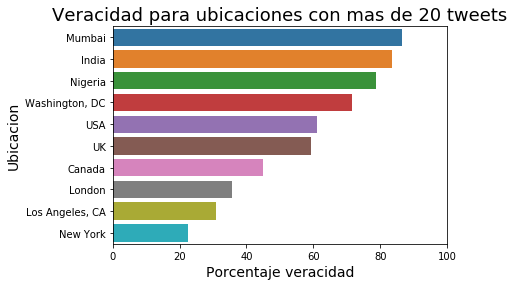

In [16]:
pd.options.display.float_format = '{:,.0f}'.format # Para tener porcentajes enteros
plot = sns.barplot(x = conUbicacion['porcentaje verdaderos'],\
                   y = conUbicacion.index, orient='h')
plot.set_title("Veracidad para ubicaciones con mas de 20 tweets", fontsize=18)
plot.set_xlabel("Porcentaje veracidad", fontsize=14)
plot.set_ylabel("Ubicacion", fontsize=14)
plot.set(xlim=(0, 100))

In [17]:
conUbicacion = conUbicacion.reset_index()
conUbicacion.loc[:,'ubicacion'] = 'Con Ubicacion'
conUbicacion.head()

,ubicacion,verdaderos,totales,falsos,porcentaje verdaderos
0,Con Ubicacion,19,22,3,86
1,Con Ubicacion,20,24,4,83
2,Con Ubicacion,22,28,6,79
3,Con Ubicacion,15,21,6,71
4,Con Ubicacion,94,154,60,61


In [18]:
sinUbicacion = sinUbicacion.reset_index()
sinUbicacion

,ubicacion,verdaderos,totales,falsos,porcentaje verdaderos
0,Sin Ubicacion,1075,2533,1458,42


In [19]:
ubicaciones = conUbicacion.append(sinUbicacion)
ubicaciones = ubicaciones.groupby('ubicacion').sum()
ubicaciones

,verdaderos,totales,falsos,porcentaje verdaderos
ubicacion,,,,
Con Ubicacion,239,447,208,574
Sin Ubicacion,1075,2533,1458,42


In [20]:
# Corrijo el porcentaje
ubicaciones['porcentaje verdaderos'] = ubicaciones['verdaderos'] / ubicaciones['totales'] * 100
ubicaciones.head()

,verdaderos,totales,falsos,porcentaje verdaderos
ubicacion,,,,
Con Ubicacion,239,447,208,53
Sin Ubicacion,1075,2533,1458,42


[(0, 100)]

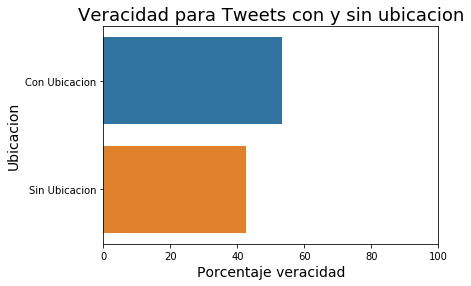

In [21]:
plot = sns.barplot(x = ubicaciones['porcentaje verdaderos'],\
                   y = ubicaciones.index, orient='h')
plot.set_title("Veracidad para Tweets con y sin ubicacion", fontsize=18)
plot.set_xlabel("Porcentaje veracidad", fontsize=14)
plot.set_ylabel("Ubicacion", fontsize=14)
plot.set(xlim=(0, 100))